The goal is to analyze this shopping trend data from kaggle posted by Sourav.

This dataset captures a wide range of customer attributes including age, gender, purchase history, preferred payment methods, frequency of purchases, and more. Analyzing this data can help businesses make informed decisions, optimize product offerings, and enhance customer satisfaction.

**Dataset Glossary (Column-wise)**

Customer ID - Unique identifier for each customer

Age - Age of the customer

Gender - Gender of the customer (Male/Female)

Item Purchased - The item purchased by the customer

Category - Category of the item purchased

Purchase Amount (USD) - The amount of the purchase in USD

Location - Location where the purchase was made

Size - Size of the purchased item

Color - Color of the purchased item

Season - Season during which the purchase was made

Review Rating - Rating given by the customer for the purchased item

Subscription Status - Indicates if the customer has a subscription (Yes/No)

Payment Method - Preferred payment method of the customer

Shipping Type - Type of shipping chosen by the customer

Discount Applied - Indicates if a discount was applied to the purchase (Yes/No)

Promo Code Used - Indicates if a promo code was used for the purchase (Yes/No)

Previous Purchases - Number of previous purchases made by the customer

Preferred Payment Method - Customer's most preferred payment method

Frequency of Purchases - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)

**Goal**
Take 3 main insights from this data.

In [ ]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [ ]:
# reading data from csv file using padas
df = pd.read_csv("shopping_trends.csv")
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


As promised by the creater of the csv file, there are no missing values, so we don't need to cleanse the data.

## Visualization 1: Customer Spending Analysis
**Variables:**

Gender

Purchase Amount (USD)

**Visualization Used:**

Bar Chart

**Explanation:**

Through a bar chart, we'll visualize and compare the average purchase amounts across different genders. Here:

The X-axis represents different genders.
The Y-axis represents the average purchase amount (USD).

In [ ]:
# Data Aggregation
avg_purchase = df.groupby('Gender')['Purchase Amount (USD)'].mean()

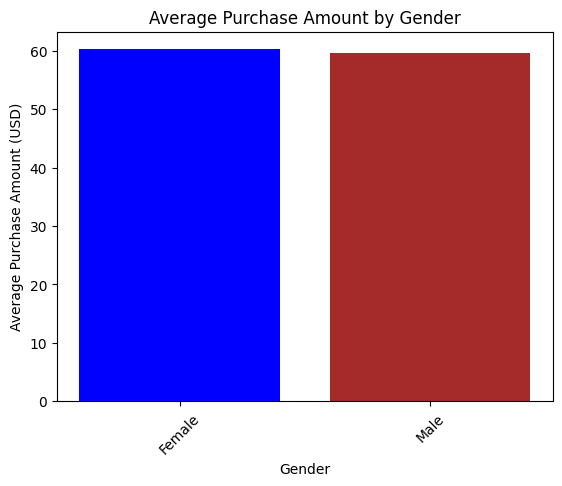

In [ ]:
# creating visualization
plt.bar(avg_purchase.index, avg_purchase.values, color=['blue', 'brown'])
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount (USD)')
plt.title('Average Purchase Amount by Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights
On comparision of the heights of the bars, we can discern the difference between spending patterns between two genders.

*It seems as if the average purchase amount is slightly higher in females than males using given data.*

## Visualization 2: Shopping Behavior Analysis

**Variables:**

Season

Category

Purchase Amount (USD)

**Visualization Used:**

Stacked Bar Chart

**Explanation:**

A stacked bar chart could be employed to explore the relationship between the "Season" and the "Purchase Amount (USD)" across different "Categories" of items. By placing "Season" on the X-axis and stacking "Categories" within each bar, you can represent the "Purchase Amount (USD)" on the Y-axis to understand the seasonal demand for different categories of items.

In [ ]:
# data aggregation
grouped_data = df.groupby(['Season','Category'])['Purchase Amount (USD)'].sum().unstack()
grouped_data

Category,Accessories,Clothing,Footwear,Outerwear
Season,,,,
Fall,19874,26220,8665,5259
Spring,17007,27692,9555,4425
Summer,19028,23078,9393,4278
Winter,18291,27274,8480,4562


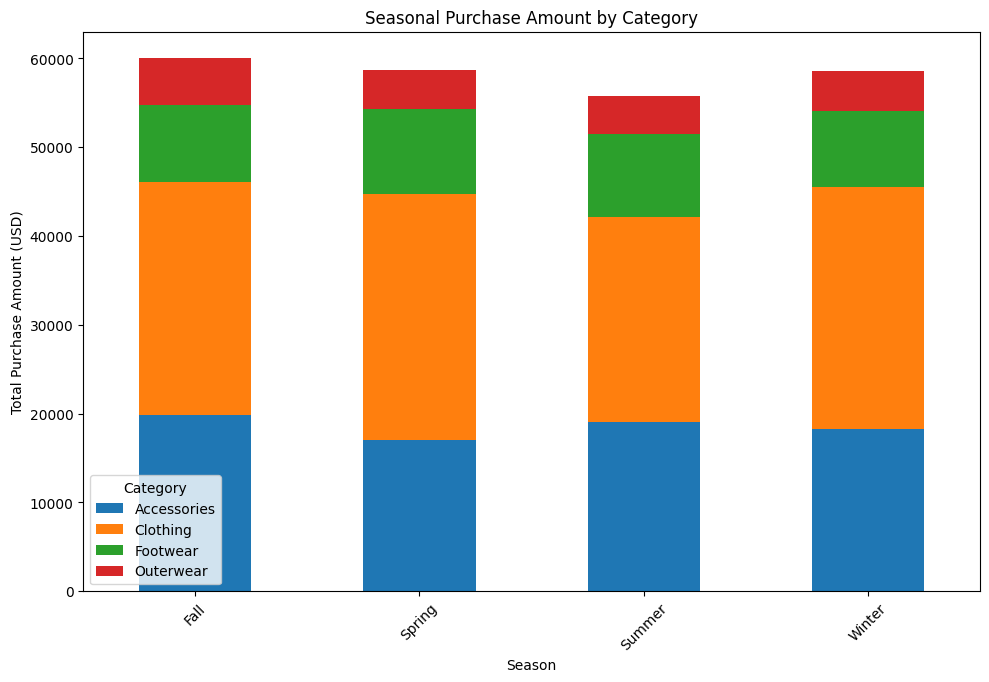

In [ ]:
# visualization
viz = grouped_data.plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('Seasonal Purchase Amount by Category')
plt.xlabel('Season')
plt.ylabel('Total Purchase Amount (USD)')
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

### Insights

On comparision of heights of total spending as well as the heights of different categories, we can determine the seasonal purchase amount.

For instance, key takeaways from this evaluation is that during fall, the total purchase is all time high for all categories of accessories, clothing, outerwear, except footwear.

Similarly, on summer, the total purchase amount is lower than other seasons, however, for categories like accessories, it is second to none, but underperforms on clothing.

On winter and spring, most of the categories are very similar, although accessories sells more on winter.

## Visualization 3: Relationship Between Location and Items Purchased

**Variables:**

Location

Item Purchased

**Visualization Used:**

Treemap

**Explanation:**

In the treemap, each location will have its own large rectangle, and within each of these rectangles, smaller rectangles represent each item purchased at that location. The size of the item rectangles is determined by the quantity purchased. This visualization provides a hierarchical view of the data and offers a quick way to discern which items are more popular at each location.

In [ ]:
# data aggregation
agg_data = df.groupby(['Location', 'Item Purchased'])['Customer ID'].count().reset_index()

In [93]:
# visualization

fig = px.treemap(agg_data, path=['Item Purchased','Location'],
                 values='Customer ID')
fig.update_layout(title='Treemap: Items Purchased by Location',
                  width=1000,
                  height=800)
fig.show()


### Insights
Clothing items that are popular in different locations can be discerned, uniquely if possible. The size of the state determines the frequency of clothing item.

For instance, It seems Georgia is a popular state where items like blouse, dress, and scandals purchases are dominant.